Data preparation:

Reutersis a dataset of 11,228 newswires from Reuters, labeled over 46 topics.

Each newswire is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

In [1]:
'''Trains and evaluate a simple MLP
on the Reuters newswire topic classification task.
'''
from __future__ import print_function

import numpy as np
import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from keras.preprocessing.text import Tokenizer
from matplotlib import pyplot

max_words = 1000
batch_size = 32
epochs = 5

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(x_train[1])
INDEX_FROM=3
word_to_id = reuters.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in x_train[1] ))
print(y_train[1])

print(' '.join(id_to_word[id] for id in x_train[48] ))
print(y_train[48])

print(' '.join(id_to_word[id] for id in x_train[159] ))
print(y_train[159])

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')


ModuleNotFoundError: No module named 'keras'

Data transformation and model building:


In [5]:

print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')

x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_test[0])






Vectorizing sequence data...
x_train shape: (8982, 1000)
x_test shape: (2246, 1000)
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 

In [6]:
print(y_test[0])

3


In [7]:
print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
print('train[1] ', y_train[1])
y_train = keras.utils.to_categorical(y_train, num_classes)
print(y_train[1])
print('test[0] ', y_test[0])
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test[0])

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)




Convert class vector to binary class matrix (for use with categorical_crossentropy)
train[1]  4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
test[0]  3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y_train shape: (8982, 46)
y_test shape: (2246, 46)


In [8]:
print('Building model...')
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())

Building model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               512512    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 536,110
Trainable params: 536,110
Non-trainable params: 0
_________________________________________________________________
None


Training and evaluation:

Epoch 1/30
253/253 [==============================] - 2s 6ms/step - loss: 0.0837 - accuracy: 0.9642 - val_loss: 1.2681 - val_accuracy: 0.7887
Epoch 2/30
253/253 [==============================] - 1s 5ms/step - loss: 0.0805 - accuracy: 0.9616 - val_loss: 1.4268 - val_accuracy: 0.7809
Epoch 3/30
253/253 [==============================] - 1s 5ms/step - loss: 0.0790 - accuracy: 0.9643 - val_loss: 1.3392 - val_accuracy: 0.7842
Epoch 4/30
253/253 [==============================] - 1s 5ms/step - loss: 0.0761 - accuracy: 0.9634 - val_loss: 1.4296 - val_accuracy: 0.7786
Epoch 5/30
253/253 [==============================] - 1s 5ms/step - loss: 0.0852 - accuracy: 0.9629 - val_loss: 1.3947 - val_accuracy: 0.7842
Epoch 6/30
253/253 [==============================] - 1s 5ms/step - loss: 0.0808 - accuracy: 0.9623 - val_loss: 1.4331 - val_accuracy: 0.7831
Epoch 7/30
253/253 [==============================] - 1s 5ms/step - loss: 0.0726 - accuracy: 0.9627 - val_loss: 1.4783 - val_accuracy: 0.7720
Epoch 

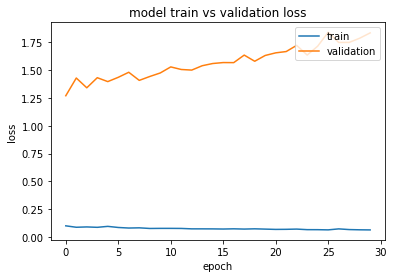

CPU times: user 57.8 s, sys: 3.62 s, total: 1min 1s
Wall time: 41.5 s


In [12]:
%%time
epochs=30
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1, validation_data=(x_test, y_test))

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [11]:
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation acc')
pyplot.ylabel('acc')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

KeyError: ignored

# Zadanie: zaproponuj drugą sieć, porównaj wyniki, postaraj się osiągnąć lepsze

In [13]:
print('Building model2...')
model2 = Sequential()
model2.add(Dense(512, input_shape=(max_words,)))
model2.add(Activation('relu'))
model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

print(model2.summary())

Building model2...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None,

In [15]:
%%time 
epochs=20
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
               metrics = ['accuracy'])

history2 = model2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1, validation_data=(x_test, y_test))



Epoch 1/20
253/253 [==============================] - 2s 8ms/step - loss: 0.2733 - accuracy: 0.9358 - val_loss: 1.0950 - val_accuracy: 0.7720
Epoch 2/20
253/253 [==============================] - 2s 7ms/step - loss: 0.1713 - accuracy: 0.9575 - val_loss: 1.1090 - val_accuracy: 0.7809
Epoch 3/20
253/253 [==============================] - 2s 7ms/step - loss: 0.1465 - accuracy: 0.9557 - val_loss: 1.2871 - val_accuracy: 0.7653
Epoch 4/20
253/253 [==============================] - 2s 7ms/step - loss: 0.1372 - accuracy: 0.9580 - val_loss: 1.2266 - val_accuracy: 0.7642
Epoch 5/20
253/253 [==============================] - 2s 7ms/step - loss: 0.1110 - accuracy: 0.9624 - val_loss: 1.2898 - val_accuracy: 0.7764
Epoch 6/20
253/253 [==============================] - 2s 7ms/step - loss: 0.1102 - accuracy: 0.9611 - val_loss: 1.3173 - val_accuracy: 0.7720
Epoch 7/20
253/253 [==============================] - 2s 7ms/step - loss: 0.1029 - accuracy: 0.9596 - val_loss: 1.4024 - val_accuracy: 0.7742
Epoch 

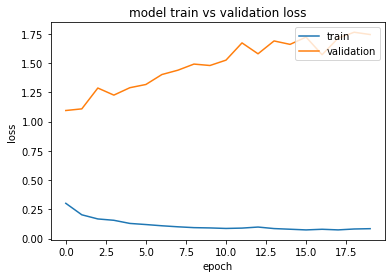

In [18]:
pyplot.plot(history2.history['loss'])
pyplot.plot(history2.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

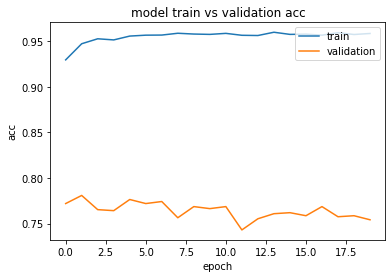

In [19]:
pyplot.plot(history2.history['accuracy'])
pyplot.plot(history2.history['val_accuracy'])
pyplot.title('model train vs validation acc')
pyplot.ylabel('acc')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [20]:
print('Building model3...')
model3 = Sequential()
model3.add(Dense(256, input_shape=(max_words,)))
model3.add(Activation('relu'))
model3.add(Dense(64))
model3.add(Activation('relu'))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

print(model3.summary())


Building model3...
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               256256    
_________________________________________________________________
activation_9 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
activation_10 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 46)                2990      
_________________________________________________________________
activation_11 (Activation)   (None, 46)                0         
Total params: 275,694
Trainable params: 275,694
Non-trainable params: 0
_____________________________

In [21]:
%%time 
epochs=20
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
               metrics = ['accuracy'])

history3 = model3.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1, validation_data=(x_test, y_test))


Epoch 1/20
253/253 [==============================] - 1s 4ms/step - loss: 1.9793 - accuracy: 0.5767 - val_loss: 1.1301 - val_accuracy: 0.7542
Epoch 2/20
253/253 [==============================] - 1s 4ms/step - loss: 0.7719 - accuracy: 0.8223 - val_loss: 0.9657 - val_accuracy: 0.7742
Epoch 3/20
253/253 [==============================] - 1s 4ms/step - loss: 0.4924 - accuracy: 0.8796 - val_loss: 0.9261 - val_accuracy: 0.7998
Epoch 4/20
253/253 [==============================] - 1s 4ms/step - loss: 0.3279 - accuracy: 0.9209 - val_loss: 0.9549 - val_accuracy: 0.7987
Epoch 5/20
253/253 [==============================] - 1s 4ms/step - loss: 0.2416 - accuracy: 0.9431 - val_loss: 1.0156 - val_accuracy: 0.7942
Epoch 6/20
253/253 [==============================] - 1s 3ms/step - loss: 0.1735 - accuracy: 0.9575 - val_loss: 1.0606 - val_accuracy: 0.7831
Epoch 7/20
253/253 [==============================] - 1s 4ms/step - loss: 0.1689 - accuracy: 0.9581 - val_loss: 1.1310 - val_accuracy: 0.7842
Epoch 

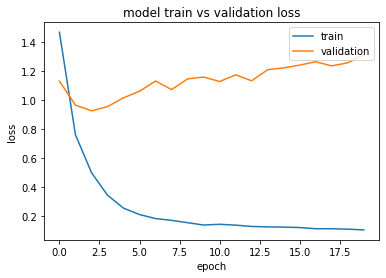

In [22]:


pyplot.plot(history3.history['loss'])
pyplot.plot(history3.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

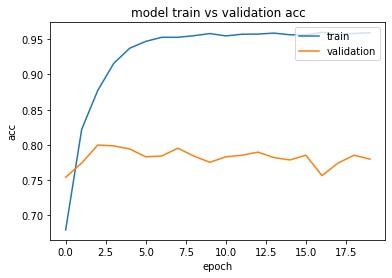

In [23]:
pyplot.plot(history3.history['accuracy'])
pyplot.plot(history3.history['val_accuracy'])
pyplot.title('model train vs validation acc')
pyplot.ylabel('acc')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()